# Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning and Loading

In [25]:
df=pd.read_csv("Datasets/accelerometer.csv")

In [26]:
df.head()

,cd Datawconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   cd Datawconfid  153000 non-null  int64  
 1   pctid           153000 non-null  int64  
 2   x               153000 non-null  float64
 3   y               153000 non-null  float64
 4   z               153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [28]:
df.value_counts()

cd Datawconfid  pctid  x      y       z     
3               25     1.000  -0.059  -0.117    7
                30     0.996  -0.027  -0.117    6
1               25     1.035   0.090  -0.117    6
3               30     0.992  -0.039  -0.113    6
2               20     1.027   0.090  -0.105    6
                                               ..
1               100    2.645   0.020  -1.031    1
                       2.637  -0.324   1.957    1
                              -0.492  -0.070    1
                       2.633  -0.164   0.816    1
3               100    1.355  -0.086  -0.133    1
Length: 146214, dtype: int64

In [29]:
df.shape

(153000, 5)

In [30]:
df.describe()

,cd Datawconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [31]:
df['cd Datawconfid'].unique()

array([1, 2, 3], dtype=int64)

# Data Visualization

array([[<AxesSubplot:title={'center':'cd Datawconfid'}>,
        <AxesSubplot:title={'center':'pctid'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

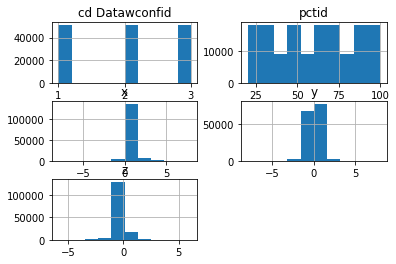

In [32]:
df.hist()

<AxesSubplot:>

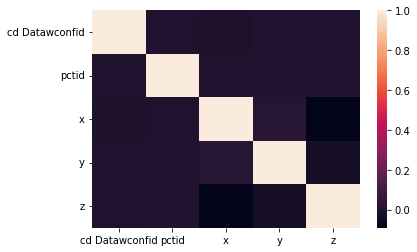

In [33]:
sns.heatmap(df.corr())

# Data Splitting

In [34]:
x_class=df.drop(['cd Datawconfid'],axis=1)
y_class=df['cd Datawconfid']

# Classification Models

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_class,y_class,test_size=0.3,random_state=0)

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
model.score(x_train,y_train)

0.9769467787114846

In [38]:
y_pred=model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.667843137254902

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 9168,  4746,  1299],
       [ 5036,  9063,  1216],
       [ 1493,  1456, 12423]], dtype=int64)

## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [42]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.5007469654528478

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5057952069716776

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 3719,  4047,  7447],
       [ 2554,  5008,  7753],
       [    0,   883, 14489]], dtype=int64)

## SVM

In [45]:
# from sklearn.svm import SVC
# model=SVC()
# model.fit(x_train,y_train)

In [46]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.5007469654528478

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5057952069716776

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 3719,  4047,  7447],
       [ 2554,  5008,  7753],
       [    0,   883, 14489]], dtype=int64)

## KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.8037908496732026

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7181917211328976

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 9853,  4189,  1171],
       [ 4227,  9966,  1122],
       [ 1071,  1155, 13146]], dtype=int64)

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred=model.predict(x_test)
model.score(x_train,y_train)

0.3219140989729225

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.3206100217864924

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 8365,  5065,  1783],
       [ 8246,  5615,  1454],
       [11901,  2735,   736]], dtype=int64)